In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

--2021-02-03 01:34:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 173.194.216.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.002s  

2021-02-03 01:34:13 (57.8 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
total_words

3211

In [4]:
len(corpus)

2159

In [5]:
corpus[:10]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,']

In [6]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [7]:
predictors.shape

(15462, 10)

In [8]:
import keras
from keras import layers

model = keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(layers.Dense(total_words, activation='relu')) 
model.add(layers.LSTM(128))
model.add(layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
dense (Dense)                (None, 10, 3211)          324311    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               1710080   
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              414219    
Total params: 2,769,710
Trainable params: 2,769,710
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(predictors, label, epochs=5, verbose=1)

Epoch 1/5
484/484 [==============================] - 4s 8ms/step - loss: 6.8652 - accuracy: 0.0272
Epoch 2/5
484/484 [==============================] - 4s 8ms/step - loss: 6.3791 - accuracy: 0.0400
Epoch 3/5
484/484 [==============================] - 4s 7ms/step - loss: 6.0588 - accuracy: 0.0578
Epoch 4/5
484/484 [==============================] - 4s 8ms/step - loss: 5.7693 - accuracy: 0.0713
Epoch 5/5
484/484 [==============================] - 4s 8ms/step - loss: 5.5104 - accuracy: 0.0811


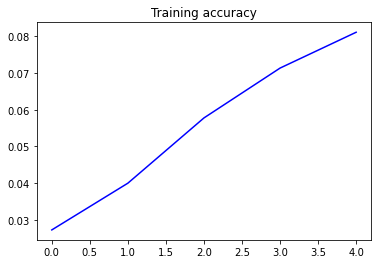

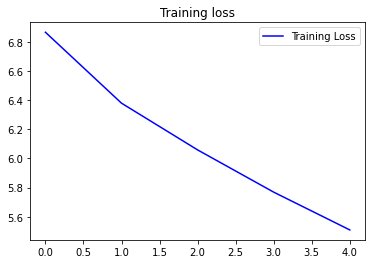

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


The model's barely performing and can tell it is not confident. Have to take the model in the directions to increase the accuracy.